In [1]:
""" # Análise do Consumo de Energia no Brasil

## 1. Introdução
Breve contexto sobre a importância do consumo de energia no país.

## 2. Fonte dos Dados
Explicação sobre a origem dos dados (ONS), periodicidade, regiões.

## 3. Limpeza e Preparação dos Dados
- Tipos de dados
- Conversão de datas
- Tratamento de valores ausentes

## 4. Análise Exploratória
- Evolução do consumo ao longo do tempo
- Comparação por região
- Sazonalidade (ex: mais consumo no verão?)

## 5. Insights e Recomendações
- Quais regiões têm maior crescimento?
- Existe tendência de desaceleração?
- Sugestões com base nos dados

## 6. Conclusão
Resumo dos achados e ideias para análises futuras.
 """

' # Análise do Consumo de Energia no Brasil\n\n## 1. Introdução\nBreve contexto sobre a importância do consumo de energia no país.\n\n## 2. Fonte dos Dados\nExplicação sobre a origem dos dados (ONS), periodicidade, regiões.\n\n## 3. Limpeza e Preparação dos Dados\n- Tipos de dados\n- Conversão de datas\n- Tratamento de valores ausentes\n\n## 4. Análise Exploratória\n- Evolução do consumo ao longo do tempo\n- Comparação por região\n- Sazonalidade (ex: mais consumo no verão?)\n\n## 5. Insights e Recomendações\n- Quais regiões têm maior crescimento?\n- Existe tendência de desaceleração?\n- Sugestões com base nos dados\n\n## 6. Conclusão\nResumo dos achados e ideias para análises futuras.\n '

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import os

In [19]:
# Fazer o download
def downloadCargaHoraria(file):
  # URL do arquivo
  url = "https://ons-aws-prod-opendata.s3.amazonaws.com/dataset/curva-carga-ho/"

  # Diretório de destino
  diretorio_destino = "../dados"

  # Criar a pasta se não existir
  os.makedirs(diretorio_destino, exist_ok=True)

  # caminho completo
  arquivo_local = os.path.join(diretorio_destino, file)

  response = requests.get(url + file)
  if response.status_code == 200:
      with open(arquivo_local, "wb") as file:
          file.write(response.content)
      print(f"Download concluído: {arquivo_local}")
  else:
      print(f"Erro ao baixar o arquivo. Código: {response.status_code}")


In [27]:
# Lista para armazenar os DataFrames de cada ano
dfs = []
# Download dos arquivos
for i in range(2020, 2025): 
  file = "CURVA_CARGA_" + str(i) + ".xlsx"
  print("Baixando demanda horária de ", i)
  downloadCargaHoraria(file)
  # Ler o arquivo e armazenar no DataFrame
  print(f"Lendo {file}...")
  diretorio_destino = "../dados"
  file_path = os.path.join(diretorio_destino, file)
  df = pd.read_excel(file_path, engine="openpyxl")

  # Adicionar uma coluna com o ano correspondente
  df["Ano"] = i  

  # Adicionar o DataFrame à lista
  dfs.append(df)

# Concatenar todos os DataFrames em um único
demanda = pd.concat(dfs, ignore_index=True)

print("Dados combinados com sucesso!")

Baixando demanda horária de  2020
Download concluído: ../dados\CURVA_CARGA_2020.xlsx
Lendo CURVA_CARGA_2020.xlsx...
Baixando demanda horária de  2021
Download concluído: ../dados\CURVA_CARGA_2021.xlsx
Lendo CURVA_CARGA_2021.xlsx...
Baixando demanda horária de  2022
Download concluído: ../dados\CURVA_CARGA_2022.xlsx
Lendo CURVA_CARGA_2022.xlsx...
Baixando demanda horária de  2023
Download concluído: ../dados\CURVA_CARGA_2023.xlsx
Lendo CURVA_CARGA_2023.xlsx...
Baixando demanda horária de  2024
Download concluído: ../dados\CURVA_CARGA_2024.xlsx
Lendo CURVA_CARGA_2024.xlsx...
Dados combinados com sucesso!


In [23]:
# Carregar o arquivo Excel
df = pd.read_excel('../dados/CURVA_CARGA_2025.xlsx', engine='openpyxl')

# Exibir as primeiras linhas do DataFrame
df.head()

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiahomwmed
0,N,NORTE,2025-01-01 00:00:00,7097.751
1,NE,NORDESTE,2025-01-01 00:00:00,12251.182
2,S,SUL,2025-01-01 00:00:00,10554.603
3,SE,SUDESTE,2025-01-01 00:00:00,35353.233
4,N,NORTE,2025-01-01 01:00:00,7053.337


In [28]:
demanda

,id_subsistema,nom_subsistema,din_instante,val_cargaenergiahomwmed,Ano
0,N,NORTE,2020-01-01 00:00:00,4889.1460,2020
1,NE,NORDESTE,2020-01-01 00:00:00,9617.9750,2020
2,S,SUL,2020-01-01 00:00:00,10013.7420,2020
3,SE,SUDESTE,2020-01-01 00:00:00,33108.8615,2020
4,N,NORTE,2020-01-01 01:00:00,4953.3150,2020
...,...,...,...,...,...
175387,SE,SUDESTE,2024-12-31 22:00:00,39017.4880,2024
175388,N,NORTE,2024-12-31 23:00:00,7243.0250,2024
175389,NE,NORDESTE,2024-12-31 23:00:00,12618.6960,2024
175390,S,SUL,2024-12-31 23:00:00,10927.9110,2024


In [29]:
# Informações gerais sobre o DataFrame
demanda.info()

# Verificar a presença de valores nulos
demanda.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175392 entries, 0 to 175391
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id_subsistema            175392 non-null  object        
 1   nom_subsistema           175392 non-null  object        
 2   din_instante             175392 non-null  datetime64[ns]
 3   val_cargaenergiahomwmed  175392 non-null  float64       
 4   Ano                      175392 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 6.7+ MB


id_subsistema              0
nom_subsistema             0
din_instante               0
val_cargaenergiahomwmed    0
Ano                        0
dtype: int64

In [ ]:
# converte a coluna de data
demanda['din_instante'] = pd.to_datetime(demanda['din_instante'])

In [57]:
# media por subsistema

# media diaria
media_diaria = (
    demanda
    .groupby([demanda["din_instante"].dt.date, "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={"din_instante": "data", "val_cargaenergiahomwmed": "media_diaria"})
)

# media mensal
media_mensal = (
    demanda
    .groupby([demanda["din_instante"].dt.to_period("M"), "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={"din_instante": "mes", "val_cargaenergiahomwmed": "media_mensal"})
)

# media anual
media_anual = (
    demanda
    .groupby([demanda["din_instante"].dt.year, "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={"din_instante": "ano", "val_cargaenergiahomwmed": "media_anual"})
)

In [54]:
media_diaria

,data,id_subsistema,media_diaria
0,2020-01-01,N,4851.266208
1,2020-01-01,NE,9118.719417
2,2020-01-01,S,9969.994875
3,2020-01-01,SE,33195.124646
4,2020-01-02,N,5213.674375
...,...,...,...
7303,2024-12-30,SE,40618.372208
7304,2024-12-31,N,7579.586500
7305,2024-12-31,NE,13092.667583
7306,2024-12-31,S,11997.240667


In [58]:
media_mensal

,mes,id_subsistema,media_mensal
0,2020-01,N,5411.998444
1,2020-01,NE,10952.558878
2,2020-01,S,12599.132948
3,2020-01,SE,39577.567549
4,2020-02,N,5513.525329
...,...,...,...
235,2024-11,SE,44152.971936
236,2024-12,N,7895.489941
237,2024-12,NE,13769.788145
238,2024-12,S,13162.192505


In [56]:
media_anual

,ano,id_subsistema,media_anual
0,2020,N,5516.814079
1,2020,NE,10300.292444
2,2020,S,11286.047079
3,2020,SE,36305.313798
4,2021,N,5986.109818
5,2021,NE,11398.230025
6,2021,S,11965.541830
7,2021,SE,39175.555353
8,2022,N,6213.991329
9,2022,NE,11171.080319


In [84]:
#resultados do SIN

# media diaria
media_diaria["data"] = pd.to_datetime(media_diaria["data"])

media_diaria_sin = (
    media_diaria
    .groupby([media_diaria["data"].dt.date])["media_diaria"]  # Remove "id_subsistema" se quer o total do SIN
    .sum()
    .reset_index()
    .rename(columns={"data": "data", "media_diaria": "carga_diaria_sin"})
)

# media mensal
media_mensal_sin = (
    media_mensal
    .groupby("mes")["media_mensal"]
    .sum()
    .reset_index()
    .rename(columns={"media_mensal": "media_mensal_sin"})
)

# media anual
media_anual_sin = (
    media_anual
    .groupby("ano")["media_anual"]
    .sum()
    .reset_index()
    .rename(columns={"media_anual": "media_anual_sin"})
)


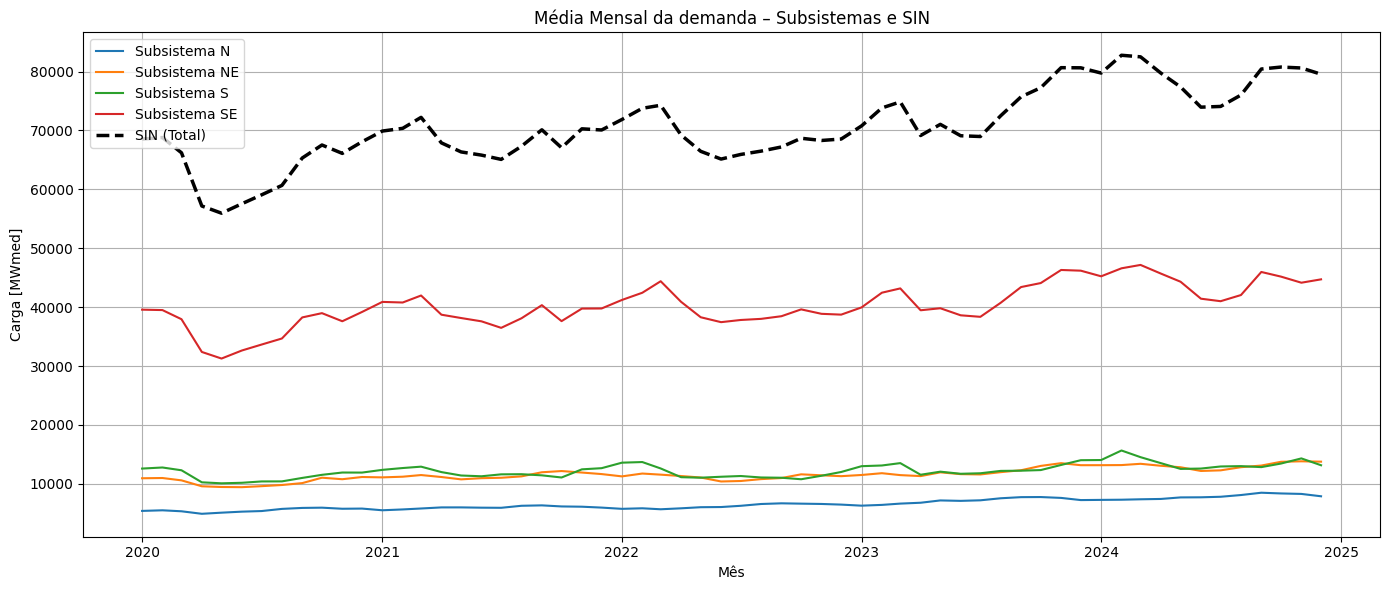

In [90]:
# Garantir tipos corretos
media_mensal["mes"] = pd.to_datetime(media_mensal["mes"])
media_mensal_sin["mes"] = pd.to_datetime(media_mensal_sin["mes"])

plt.figure(figsize=(14, 6))

# Plotar cada subsistema
for id_sub in media_mensal["id_subsistema"].unique():
    dados_sub = media_mensal[media_mensal["id_subsistema"] == id_sub]
    plt.plot(dados_sub["mes"], dados_sub["media_mensal"], label=f"Subsistema {id_sub}")

# Plotar linha do SIN
plt.plot(media_mensal_sin["mes"], media_mensal_sin["media_mensal_sin"],
         label="SIN (Total)", color="black", linewidth=2.5, linestyle="--")

# Personalização
plt.title("Média Mensal da demanda – Subsistemas e SIN")
plt.xlabel("Mês")
plt.ylabel("Carga [MWmed]")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


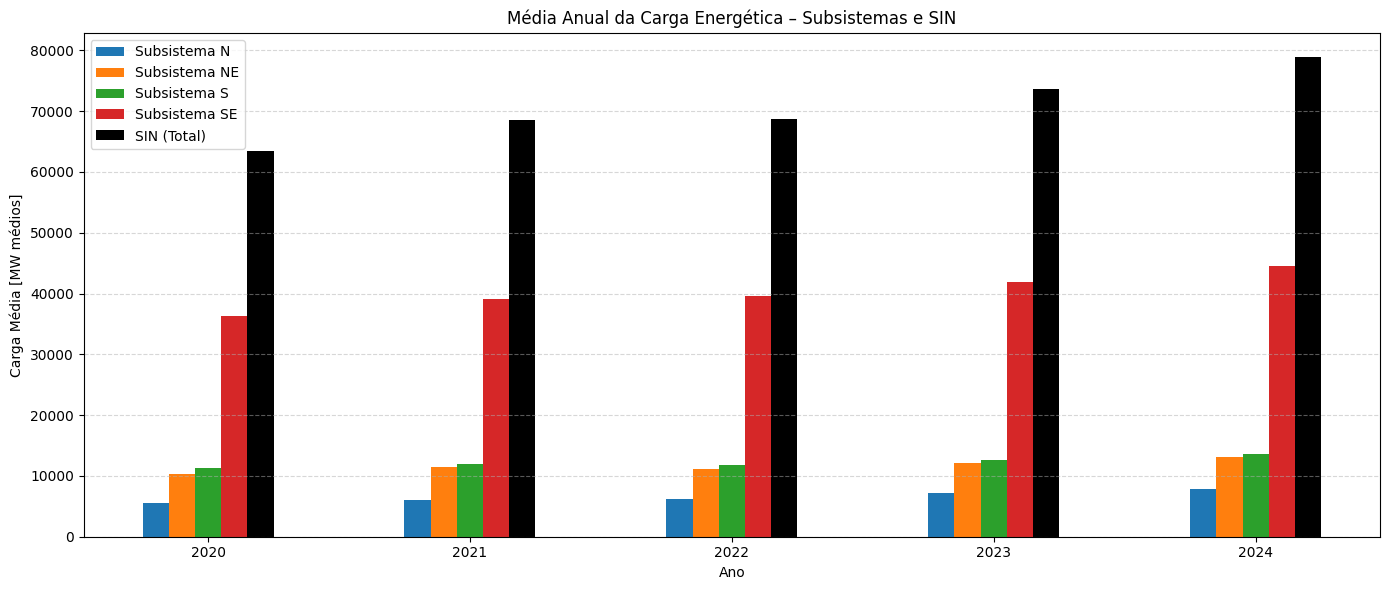

In [ ]:
# Obter anos únicos
anos = sorted(media_anual["ano"].unique())
subsistemas = sorted(media_anual["id_subsistema"].unique())

# Largura de cada barra
bar_width = 0.1
posicoes = np.arange(len(anos))

plt.figure(figsize=(14, 6))

# Plotar barras para cada subsistema
for i, id_sub in enumerate(subsistemas):
    dados_sub = media_anual[media_anual["id_subsistema"] == id_sub]
    plt.bar(posicoes + i * bar_width, dados_sub["media_anual"], width=bar_width, label=f"Subsistema {id_sub}")

# Adicionar barras do SIN
plt.bar(posicoes + len(subsistemas) * bar_width, media_anual_sin["media_anual_sin"],
        width=bar_width, color="black", label="SIN (Total)")

# Ajustes do eixo x
plt.xticks(posicoes + (len(subsistemas) / 2) * bar_width, anos)
plt.xlabel("Ano")
plt.ylabel("Carga Média [MWmed]")
plt.title("Média Anual da demanda – Subsistemas e SIN")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
## Calcular sazonalidade da carga - considerando 2020 e 2021 - ano da pandemia

# calculo dos fatores 
media_anual = (
    demanda
    .groupby([demanda["din_instante"].dt.year, "id_subsistema"])["val_cargaenergiahomwmed"]
    .mean()
    .reset_index()
    .rename(columns={
        "din_instante": "ano",
        "val_cargaenergiahomwmed": "media_anual"
    })
)

# Extrair o ano das datas mensais
media_mensal["ano"] = media_mensal["mes"].dt.year

# Juntar com a média anual por subsistema
media_mensal_com_anual = pd.merge(
    media_mensal,
    media_anual,
    on=["ano", "id_subsistema"],
    how="left"
)

media_mensal_com_anual["fator_sazonal"] = (
    media_mensal_com_anual["media_mensal"] / media_mensal_com_anual["media_anual"]
)


# calculo da sazo

# Extrair o número do mês
media_mensal_com_anual["mes_num"] = media_mensal_com_anual["mes"].dt.month

# Calcular média dos fatores por mês e subsistema
fatores_sazonais = (
    media_mensal_com_anual
    .groupby(["mes_num", "id_subsistema"])["fator_sazonal"]
    .mean()
    .reset_index()
)

# Extrair ano
media_mensal_sin["ano"] = media_mensal_sin["mes"].dt.year

# Calcular média anual do SIN
media_anual_sin = (
    media_mensal_sin
    .groupby("ano")["media_mensal_sin"]
    .mean()
    .reset_index()
    .rename(columns={"media_mensal_sin": "media_anual_sin"})
)

# Juntar com dados mensais
media_mensal_sin_com_anual = pd.merge(
    media_mensal_sin,
    media_anual_sin,
    on="ano",
    how="left"
)

# Fator sazonal do SIN
media_mensal_sin_com_anual["mes_num"] = media_mensal_sin_com_anual["mes"].dt.month
media_mensal_sin_com_anual["fator_sazonal_sin"] = (
    media_mensal_sin_com_anual["media_mensal_sin"] / media_mensal_sin_com_anual["media_anual_sin"]
)

# Média por mês
fatores_sazonais_sin = (
    media_mensal_sin_com_anual
    .groupby("mes_num")["fator_sazonal_sin"]
    .mean()
    .reset_index()
)


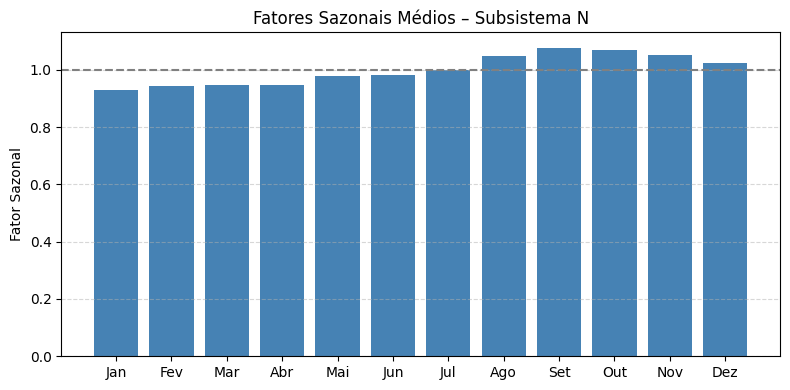

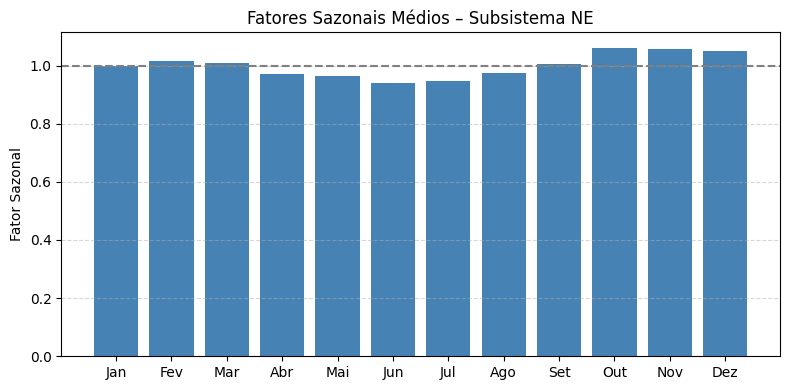

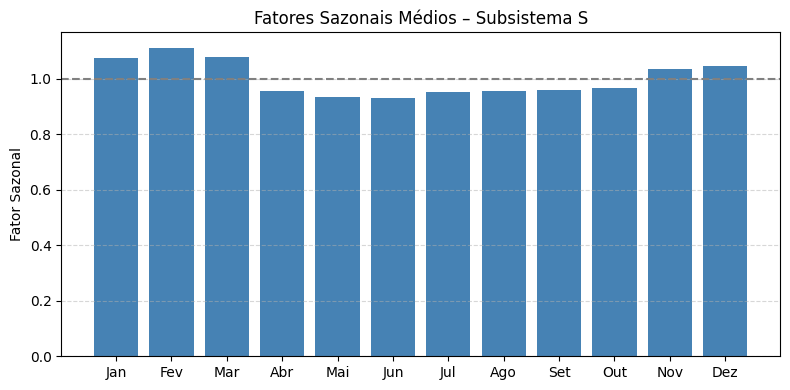

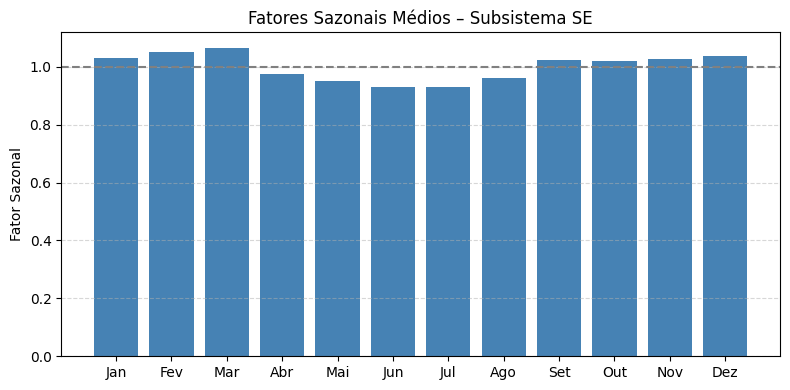

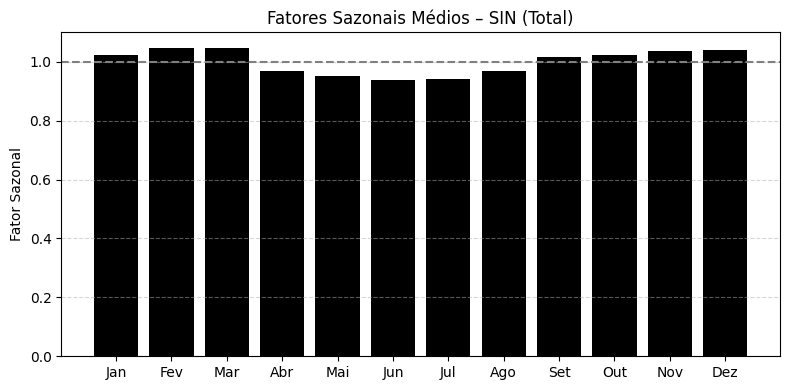

In [ ]:
meses_nome = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", 
              "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

subsistemas = fatores_sazonais["id_subsistema"].unique()

# Gráfico por subsistema
for id_sub in subsistemas:
    dados = fatores_sazonais[fatores_sazonais["id_subsistema"] == id_sub]

    plt.figure(figsize=(8, 4))
    plt.bar(dados["mes_num"], dados["fator_sazonal"], color="steelblue")
    plt.xticks(ticks=range(1, 13), labels=meses_nome)
    plt.title(f"Fatores Sazonais Médios – Subsistema {id_sub}")
    plt.ylabel("Fator Sazonal")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.axhline(1.0, color="gray", linestyle="--")
    plt.tight_layout()
    plt.show()

# Gráfico para o SIN
plt.figure(figsize=(8, 4))
plt.bar(fatores_sazonais_sin["mes_num"], fatores_sazonais_sin["fator_sazonal_sin"], color="black")
plt.xticks(ticks=range(1, 13), labels=meses_nome)
plt.title("Fatores Sazonais Médios – SIN (Total)")
plt.ylabel("Fator Sazonal")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.axhline(1.0, color="gray", linestyle="--")
plt.tight_layout()
plt.show()


In [101]:
# Excluir 2020 e 2021 do dataframe original com médias mensais + anuais
media_mensal_filtrada = media_mensal_com_anual[~media_mensal_com_anual["ano"].isin([2020, 2021])]
media_mensal_sin_filtrada = media_mensal_sin_com_anual[~media_mensal_sin_com_anual["ano"].isin([2020, 2021])]

## Calcular sazo desconsiderando 2020 e 2021
# Subsistemas
fatores_sazonais_filtrados = (
    media_mensal_filtrada
    .groupby(["mes_num", "id_subsistema"])["fator_sazonal"]
    .mean()
    .reset_index()
)

# SIN
fatores_sazonais_sin_filtrados = (
    media_mensal_sin_filtrada
    .groupby("mes_num")["fator_sazonal_sin"]
    .mean()
    .reset_index()
)


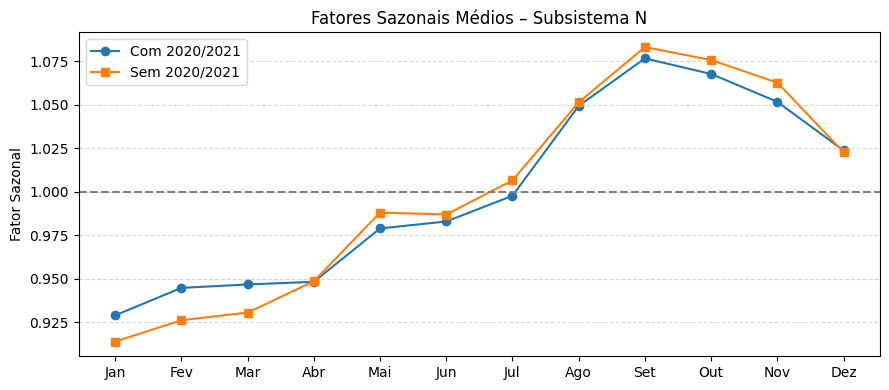

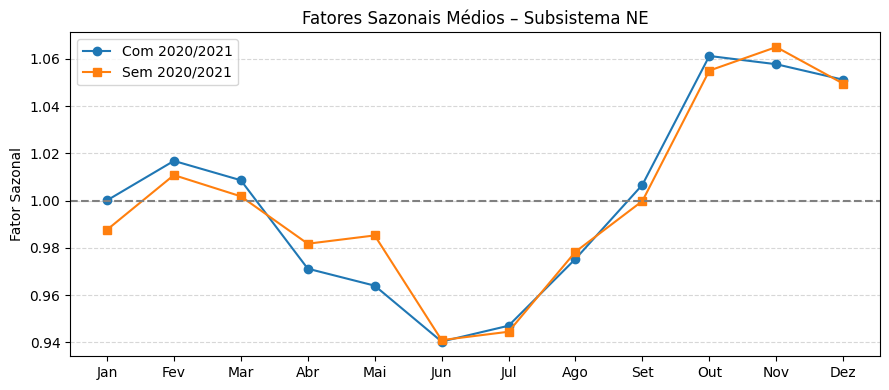

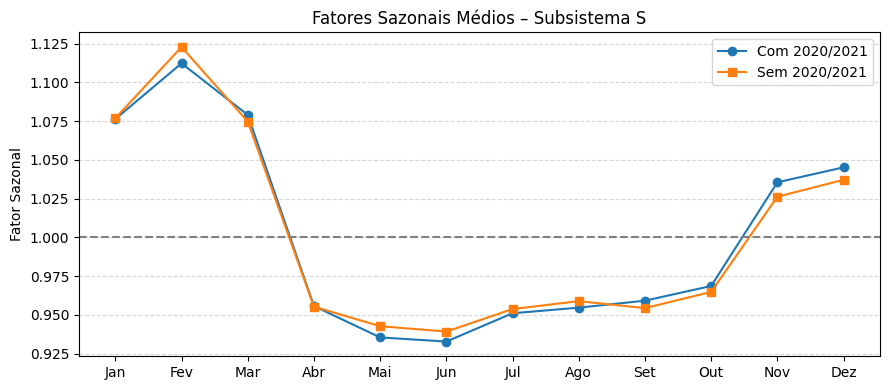

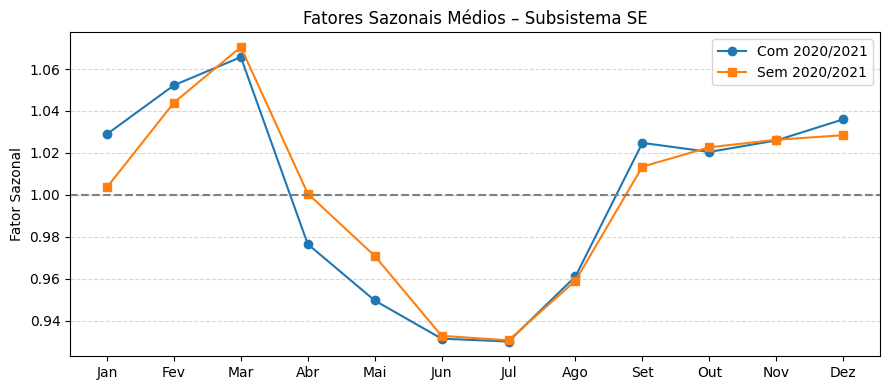

In [102]:
meses_nome = ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", 
              "Jul", "Ago", "Set", "Out", "Nov", "Dez"]

subsistemas = fatores_sazonais["id_subsistema"].unique()

for id_sub in subsistemas:
    dados_completo = fatores_sazonais[fatores_sazonais["id_subsistema"] == id_sub]
    dados_filtrado = fatores_sazonais_filtrados[fatores_sazonais_filtrados["id_subsistema"] == id_sub]

    plt.figure(figsize=(9, 4))
    plt.plot(dados_completo["mes_num"], dados_completo["fator_sazonal"], label="Com 2020/2021", marker="o")
    plt.plot(dados_filtrado["mes_num"], dados_filtrado["fator_sazonal"], label="Sem 2020/2021", marker="s")
    plt.axhline(1.0, color="gray", linestyle="--")
    plt.xticks(ticks=range(1, 13), labels=meses_nome)
    plt.title(f"Fatores Sazonais Médios – Subsistema {id_sub}")
    plt.ylabel("Fator Sazonal")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


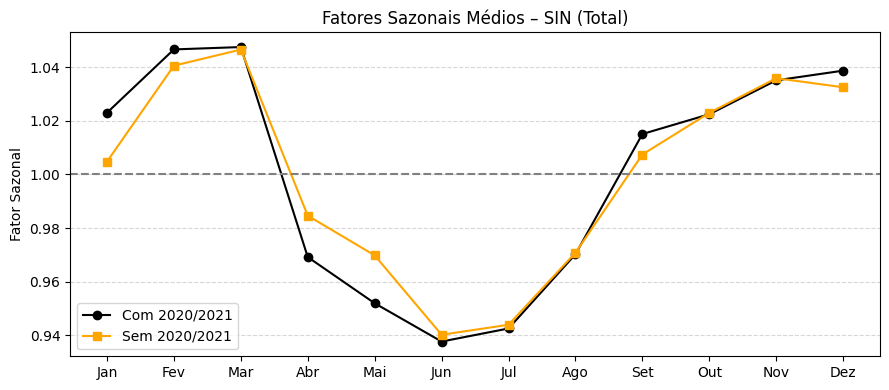

In [103]:
plt.figure(figsize=(9, 4))
plt.plot(fatores_sazonais_sin["mes_num"], fatores_sazonais_sin["fator_sazonal_sin"], label="Com 2020/2021", marker="o", color="black")
plt.plot(fatores_sazonais_sin_filtrados["mes_num"], fatores_sazonais_sin_filtrados["fator_sazonal_sin"], label="Sem 2020/2021", marker="s", color="orange")
plt.axhline(1.0, color="gray", linestyle="--")
plt.xticks(ticks=range(1, 13), labels=meses_nome)
plt.title("Fatores Sazonais Médios – SIN (Total)")
plt.ylabel("Fator Sazonal")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


In [104]:
## dados em forma de tabela

# Renomear colunas para facilitar o merge
sin_completo = fatores_sazonais_sin.rename(columns={"fator_sazonal_sin": "completo"})
sin_filtrado = fatores_sazonais_sin_filtrados.rename(columns={"fator_sazonal_sin": "filtrado"})

# Juntar os dois
comparacao_sin = pd.merge(sin_completo, sin_filtrado, on="mes_num")

# Calcular a diferença
comparacao_sin["diferenca"] = comparacao_sin["filtrado"] - comparacao_sin["completo"]

# Adicionar nome do mês
comparacao_sin["mes"] = comparacao_sin["mes_num"].map({
    1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"
})

# Reorganizar colunas
comparacao_sin = comparacao_sin[["mes", "completo", "filtrado", "diferenca"]]

# Separar original e filtrado
subs_completo = fatores_sazonais.rename(columns={"fator_sazonal": "completo"})
subs_filtrado = fatores_sazonais_filtrados.rename(columns={"fator_sazonal": "filtrado"})

# Juntar
comparacao_subs = pd.merge(
    subs_completo,
    subs_filtrado,
    on=["mes_num", "id_subsistema"]
)

# Calcular diferença
comparacao_subs["diferenca"] = comparacao_subs["filtrado"] - comparacao_subs["completo"]

# Nome do mês
comparacao_subs["mes"] = comparacao_subs["mes_num"].map({
    1: "Jan", 2: "Fev", 3: "Mar", 4: "Abr", 5: "Mai", 6: "Jun",
    7: "Jul", 8: "Ago", 9: "Set", 10: "Out", 11: "Nov", 12: "Dez"
})

# Reordenar colunas
comparacao_subs = comparacao_subs[["id_subsistema", "mes", "completo", "filtrado", "diferenca"]]


In [ ]:
# tabela N
subs_id = comparacao_subs["id_subsistema"].unique()[0]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))

   id_subsistema  mes  completo  filtrado  diferenca
0              N  Jan    0.9289    0.9138    -0.0151
4              N  Fev    0.9447    0.9261    -0.0186
8              N  Mar    0.9466    0.9304    -0.0162
12             N  Abr    0.9482    0.9485     0.0003
16             N  Mai    0.9789    0.9880     0.0092
20             N  Jun    0.9829    0.9869     0.0040
24             N  Jul    0.9977    1.0065     0.0089
28             N  Ago    1.0494    1.0515     0.0021
32             N  Set    1.0767    1.0832     0.0065
36             N  Out    1.0677    1.0758     0.0080
40             N  Nov    1.0517    1.0627     0.0110
44             N  Dez    1.0237    1.0227    -0.0010


In [106]:
# tabela NE
subs_id = comparacao_subs["id_subsistema"].unique()[1]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))


   id_subsistema  mes  completo  filtrado  diferenca
1             NE  Jan    1.0001    0.9876    -0.0125
5             NE  Fev    1.0168    1.0108    -0.0060
9             NE  Mar    1.0086    1.0018    -0.0068
13            NE  Abr    0.9712    0.9818     0.0106
17            NE  Mai    0.9640    0.9853     0.0213
21            NE  Jun    0.9403    0.9409     0.0006
25            NE  Jul    0.9470    0.9445    -0.0025
29            NE  Ago    0.9753    0.9783     0.0030
33            NE  Set    1.0067    0.9998    -0.0069
37            NE  Out    1.0613    1.0551    -0.0062
41            NE  Nov    1.0578    1.0651     0.0073
45            NE  Dez    1.0512    1.0496    -0.0016


In [ ]:
# tabela S
subs_id = comparacao_subs["id_subsistema"].unique()[2]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))


   id_subsistema  mes  completo  filtrado  diferenca
2              S  Jan    1.0763    1.0768     0.0005
6              S  Fev    1.1123    1.1228     0.0105
10             S  Mar    1.0790    1.0747    -0.0043
14             S  Abr    0.9556    0.9552    -0.0004
18             S  Mai    0.9354    0.9426     0.0072
22             S  Jun    0.9327    0.9392     0.0064
26             S  Jul    0.9510    0.9537     0.0027
30             S  Ago    0.9546    0.9588     0.0042
34             S  Set    0.9591    0.9543    -0.0048
38             S  Out    0.9686    0.9648    -0.0038
42             S  Nov    1.0355    1.0262    -0.0093
46             S  Dez    1.0452    1.0371    -0.0081


In [ ]:
# tabela SE
subs_id = comparacao_subs["id_subsistema"].unique()[3]  # ou outro id que quiser
print(comparacao_subs[comparacao_subs["id_subsistema"] == subs_id].round(4))

### OU SEJA, a pandemia tem pouco efeito para SAZO

   id_subsistema  mes  completo  filtrado  diferenca
3             SE  Jan    1.0290    1.0036    -0.0254
7             SE  Fev    1.0522    1.0439    -0.0083
11            SE  Mar    1.0657    1.0705     0.0048
15            SE  Abr    0.9765    1.0006     0.0241
19            SE  Mai    0.9496    0.9709     0.0213
23            SE  Jun    0.9314    0.9328     0.0013
27            SE  Jul    0.9301    0.9306     0.0006
31            SE  Ago    0.9611    0.9591    -0.0020
35            SE  Set    1.0248    1.0135    -0.0113
39            SE  Out    1.0205    1.0227     0.0022
43            SE  Nov    1.0259    1.0263     0.0003
47            SE  Dez    1.0360    1.0284    -0.0076


In [109]:
print(comparacao_sin.round(4))

    mes  completo  filtrado  diferenca
0   Jan    1.0230    1.0048    -0.0182
1   Fev    1.0466    1.0405    -0.0061
2   Mar    1.0475    1.0465    -0.0009
3   Abr    0.9692    0.9846     0.0154
4   Mai    0.9520    0.9698     0.0178
5   Jun    0.9377    0.9402     0.0025
6   Jul    0.9426    0.9440     0.0014
7   Ago    0.9703    0.9708     0.0006
8   Set    1.0151    1.0074    -0.0076
9   Out    1.0224    1.0229     0.0005
10  Nov    1.0351    1.0359     0.0008
11  Dez    1.0387    1.0325    -0.0062
